In [1]:
# import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1

Write a function that returns a list of numbers, such that $x_i=i^2$, for $1\leq i \leq n$. Make sure it handles the case where $n<1$ by raising a `ValueError`.

In [2]:
def squares(n):
    """Compute the squares of numbers from 1 to n, such that the 
    ith element of the returned list equals i^2.
    
    """
    ### BEGIN SOLUTION
    if n < 1:
        raise ValueError("n must be greater than or equal to 1")
    return [i ** 2 for i in xrange(1, n + 1)]
    ### END SOLUTION

Your function should print `[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]` for $n=10$. Check that it does:

In [3]:
squares(10)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [4]:
"""Check that squares returns the correct output for several inputs"""
from nose.tools import assert_equal
assert_equal(squares(1), [1])
assert_equal(squares(2), [1, 4])
assert_equal(squares(10), [1, 4, 9, 16, 25, 36, 49, 64, 81, 100])
assert_equal(squares(11), [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121])

In [5]:
"""Check that squares raises an error for invalid inputs"""
from nose.tools import assert_raises
assert_raises(ValueError, squares, 0)
assert_raises(ValueError, squares, -4)

---

## Problem 2

### Part A

Using your `squares` function, write a function that computes the sum of the squares of the numbers from 1 to $n$. Your function should call the `squares` function -- it should NOT reimplement its functionality.

In [6]:
def sum_of_squares(n):
    """Compute the sum of the squares of numbers from 1 to n."""
    ### BEGIN SOLUTION
    return sum(squares(n))
    ### END SOLUTION

The sum of squares from 1 to 10 should be 385. Verify that this is the answer you get:

In [7]:
sum_of_squares(10)

385

In [8]:
"""Check that sum_of_squares returns the correct answer for various inputs."""
assert_equal(sum_of_squares(1), 1)
assert_equal(sum_of_squares(2), 5)
assert_equal(sum_of_squares(10), 385)
assert_equal(sum_of_squares(11), 506)

In [9]:
"""Check that sum_of_squares relies on squares."""
orig_squares = squares
del squares
try:
    assert_raises(NameError, sum_of_squares, 1)
except AssertionError:
    raise AssertionError("sum_of_squares does not use squares")
finally:
    squares = orig_squares

### Part B

Using LaTeX math notation, write out the equation that is implemented by your `sum_of_squares` function.

$\sum_{i=1}^n i^2$

### Part C

Create a plot of the sum of squares for $n=1$ to $n=15$. Make sure to appropriately label the $x$-axis and $y$-axis, and to give the plot a title. Set the $x$-axis limits to be 1 (minimum) and 15 (maximum).

(1, 15)

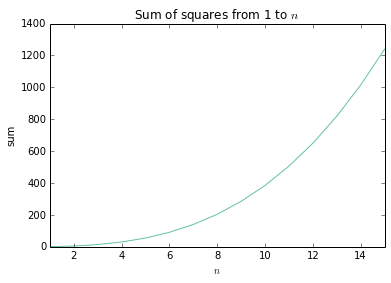

In [10]:
fig, ax = plt.subplots() # do not delete this line!
### BEGIN SOLUTION
x = range(1, 16)
y = [sum_of_squares(x[i]) for i in xrange(len(x))]
ax.plot(x, y)
ax.set_title("Sum of squares from 1 to $n$")
ax.set_xlabel("$n$")
ax.set_ylabel("sum")
ax.set_xlim([1, 15])
### END SOLUTION

In [11]:
"""Check that the axis limits are correct."""
assert_equal(ax.get_xlim(), (1.0, 15.0))

In [12]:
"""Check that the axis labels and title are set."""
assert ax.get_xlabel() != "", "xlabel not set"
assert ax.get_ylabel() != "", "ylabel not set"
assert ax.get_title() != "", "title not set"

In [13]:
"""Check that the correct data was used."""
lines = ax.get_lines()
assert_equal(len(lines), 1)

# check the x-axis data
xdata = lines[0].get_xdata()
xdata_correct = np.arange(1, 16)
assert_equal(xdata.shape, xdata_correct.shape)
assert (xdata == xdata_correct).all()

# check the y-axis data
ydata = lines[0].get_ydata()
ydata_correct = np.array([sum_of_squares(x) for x in xdata])
assert_equal(ydata.shape, ydata_correct.shape)
assert (ydata == ydata_correct).all()